In [1]:
## Setup tools
import matplotlib.pyplot as plt
import numpy as np

import nengo

from nengo.dists import Uniform
from nengo.processes import Piecewise

Build model

Given an input dictionary of ``{0: 0, 0.5: -1, 0.75: 0.5, 1: 0}``, this process  will emit the numerical values (0, -1, 0.5, 0) starting at the corresponding time points (0, 0.5, 0.75, 1).

We use this to give the model time to catch up.

We will also need a delay node otherwise the potential will continuously build instead of incrementally adding.

In [2]:
# We'll make a simple object to implement the delayed connection
class Delay:
    def __init__(self, dimensions, timesteps=50):
        self.history = np.zeros((timesteps, dimensions))

    def step(self, t, x):
        self.history = np.roll(self.history, -1)
        self.history[-1] = x
        return self.history[0]

dt = 0.001
delay = Delay(1, timesteps=int(0.2 / 0.001))


# Create the model object
model = nengo.Network(label="Feedback")
with model:
    # Create 3 ensembles each containing 100 leaky integrate-and-fire neurons
    A = nengo.Ensemble(1000, dimensions=1)
    #B = nengo.Ensemble(1000, dimensions=1)
    delaynode = nengo.Node(delay.step, size_in=1, size_out=1)


with model:
    # Create input node representing constant value
    #input_a = nengo.Node(.2)
    input_a = nengo.Node(Piecewise({0: 0, .5: .2, .6: 0}))

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(input_a, A)
    nengo.Connection(A, delaynode)
    nengo.Connection(delaynode, A)


Probe to see data

In [3]:
with model:
    input_probe = nengo.Probe(input_a)
    output_probe = nengo.Probe(A, synapse=0.01)
    delay_probe = nengo.Probe(delaynode, synapse=0.01)

Create the simulator and run

In [4]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(7)

Build finished in 0:00:01.                                                      
Simulation finished in 0:00:06.                                                 


Plot data

Text(0.5, 0, 'time [s]')

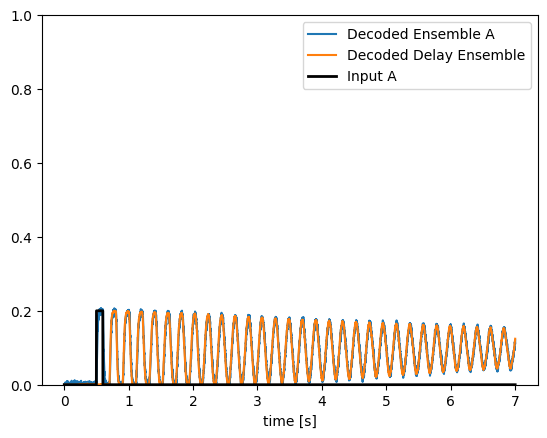

In [5]:
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[output_probe], label="Decoded Ensemble A")
plt.plot(sim.trange(), sim.data[delay_probe], label="Decoded Delay Ensemble")
plt.plot(
    sim.trange(), sim.data[input_probe], label="Input A", color="k", linewidth=2.0
)
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")

Text(0.5, 0, 'time [s]')

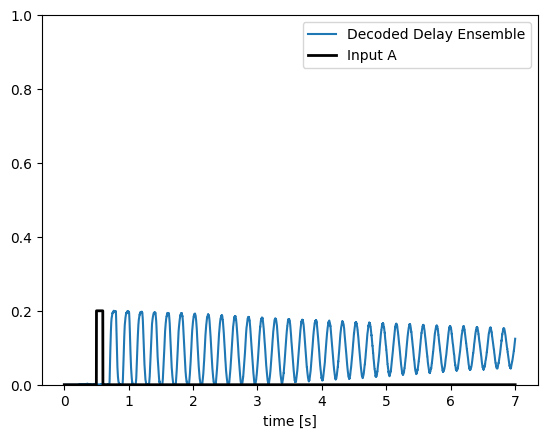

In [6]:
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[delay_probe], label="Decoded Delay Ensemble")
plt.plot(
    sim.trange(), sim.data[input_probe], label="Input A", color="k", linewidth=2.0
)
plt.legend()
plt.ylim(0, 1)
plt.xlabel("time [s]")